In [3]:
#ALLEN HABIBOVIC CS419 Final Project/Paper

#necessary modules/libraries for data preprocessing and of building a RandomForestClassifier model
#dataset was downloaded from: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

from sklearn.ensemble import RandomForestClassifier #RandomForestClassifier(ML model)
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#features are everything except the diagnosis columns and id(unrelated attribute)
#and the Unnamed: 32 attribute all the way to the right
#dependant variable y is either 1: Malignant or 0: Benign
y = df['diagnosis']
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1)

In [6]:
#convert categorical M/B to 1/0 correspondingly
le = LabelEncoder()
le.fit(y)
y = le.transform(y)

In [7]:
X.info()

#all attributes are float64's and no missing data in any sample

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal_dimension_mean   569 non-null    float64
 10  radius_se                569 non-null    float64
 11  texture_se               569 non-null    float64
 12  perimeter_se             569 non-null    float64
 13  area_se                  569 non-null    float64
 14  smoothness_se            5

In [9]:
#find attribute pair with highest correlation
features = list(X.columns)
corr_matrix = np.array(X.corr())

max_corr = 0.0
feature_n1 = ""
feature_n2 = ""

for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if abs(corr_matrix[i, j]) > max_corr and i != j:
            max_corr = abs(corr_matrix[i, j])
            feature_n1 = features[i]
            feature_n2 = features[j]
            
print(f"max correlation: {max_corr}, {feature_n1}, {feature_n2}")

max correlation: 0.9978552814938113, radius_mean, perimeter_mean


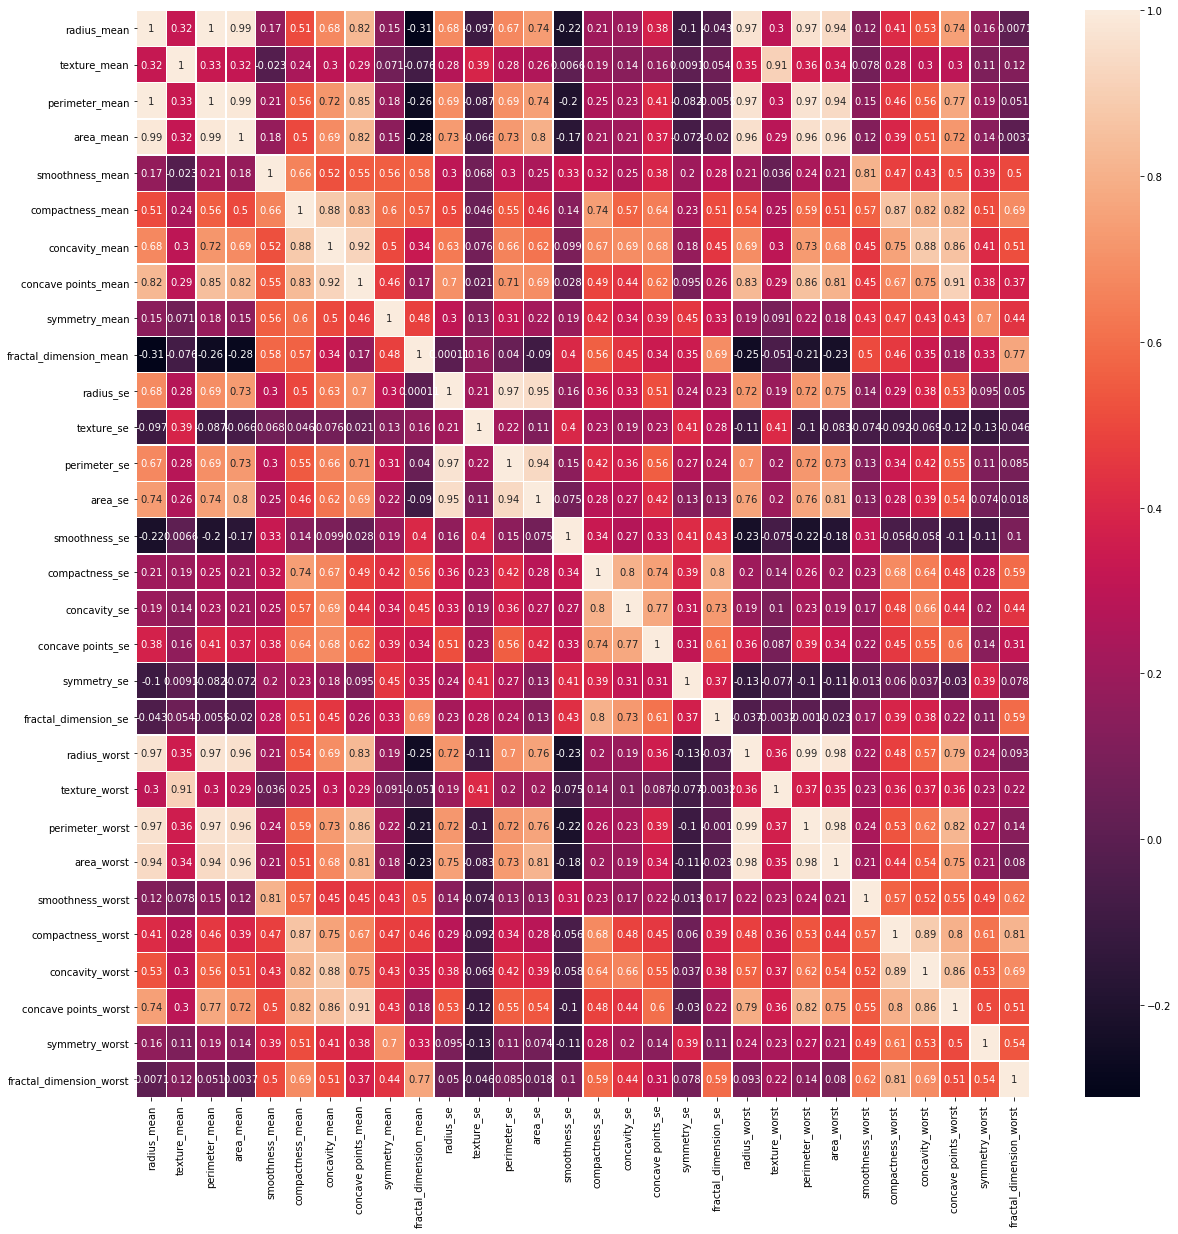

In [10]:
#create heatmap visual of correlation square matrix with seaborn
plt.figure(figsize=(20,20))
ax = sns.heatmap(X.corr(), annot=True, linewidths=.5)

In [11]:
#use train_test_split function to partition data int training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train.describe()
#range of values varies from each feature, should use StandardScaler to remove
#mean and scale by sdev.

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,...,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000,455.000000
mean,14.117635,19.185033,91.882242,654.377582,0.095744,0.103619,0.088898,0.048280,0.181099,0.062757,...,16.235103,25.535692,107.103121,876.987033,0.131532,0.252742,0.274595,0.114182,0.290502,0.083868
std,3.535815,4.266005,24.322027,354.943187,0.013923,0.052470,0.079468,0.038060,0.027487,0.007210,...,4.811267,6.065108,33.374664,567.672841,0.023083,0.155014,0.209398,0.065326,0.063151,0.017848
min,7.691000,9.710000,47.920000,170.400000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,8.678000,12.020000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.705000,16.170000,75.100000,420.300000,0.085825,0.062890,0.029320,0.020340,0.161850,0.057645,...,13.055000,21.045000,84.255000,516.450000,0.114400,0.144950,0.116550,0.063930,0.249500,0.071050
50%,13.300000,18.680000,85.980000,551.700000,0.094620,0.090970,0.061540,0.033410,0.179200,0.061480,...,14.970000,25.220000,97.670000,686.600000,0.130900,0.210100,0.226400,0.098610,0.282700,0.080060
75%,15.740000,21.585000,103.750000,767.600000,0.104550,0.131300,0.132350,0.073895,0.195800,0.066100,...,18.410000,29.690000,124.650000,1031.500000,0.146050,0.341600,0.387200,0.161100,0.317750,0.092070
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.218400,0.937900,1.252000,0.291000,0.663800,0.173000


In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

In [14]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

In [15]:
#our randomforestclassifier model with 500 random sequential weak decisiontrees

forest_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1)
#fit the model to our training data
forest_clf.fit(X_train, y_train)

#make an array of predictions for X_test
y_pred_rf = forest_clf.predict(X_test)
print("Accuracy Score of Random Forest Classifier:", accuracy_score(y_test, y_pred_rf)*100)

#this model achieves an accuracy metrix of 96.5% on the test set.

Accuracy Score of Random Forest Classifier: 96.49122807017544


In [16]:
#checking the importance of features, which feature reduces gini-impurity most
#this is a weighted avg(info gain)
best_feature = ""
best_feature_score = 0.0
for feature, score in zip(features, forest_clf.feature_importances_):
    print(feature, f"{round(score*100, 2)}%")
    if score > best_feature_score:
        best_feature_score = score
        best_feature = feature

print(f"Best feature: {best_feature}, score: {round(best_feature_score*100, 2)}%")

radius_mean 5.05%
texture_mean 1.52%
perimeter_mean 4.89%
area_mean 3.7%
smoothness_mean 0.63%
compactness_mean 1.43%
concavity_mean 4.36%
concave points_mean 12.65%
symmetry_mean 0.29%
fractal_dimension_mean 0.41%
radius_se 1.39%
texture_se 0.54%
perimeter_se 1.38%
area_se 3.74%
smoothness_se 0.29%
compactness_se 0.35%
concavity_se 0.65%
concave points_se 0.39%
symmetry_se 0.41%
fractal_dimension_se 0.6%
radius_worst 10.12%
texture_worst 1.79%
perimeter_worst 11.81%
area_worst 9.23%
smoothness_worst 1.3%
compactness_worst 1.5%
concavity_worst 4.13%
concave points_worst 13.48%
symmetry_worst 1.36%
fractal_dimension_worst 0.63%
Best feature: concave points_worst, score: 13.48%


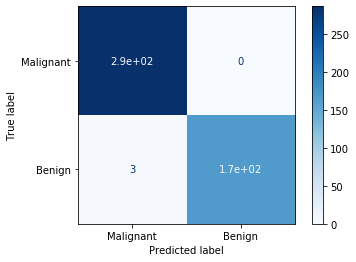

In [18]:
#construct and plot a confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

class_names = ['Malignant', 'Benign']
plot_confusion_matrix(forest_clf, X_train, y_train, display_labels=class_names, cmap=plt.cm.Blues)
plt.show()

In [19]:
#k-folds cross validation, k = 5
print(cross_val_score(forest_clf, X, y, cv=5))

avg_cv_score = cross_val_score(forest_clf, X, y, cv=5).mean()
print(f"Avg CV Accuracy:{avg_cv_score*100}%")

[0.92105263 0.94736842 0.98245614 0.98245614 0.97345133]
Avg CV Accuracy:95.95870206489676%


In [20]:
#hyperparamter tuning of RandomForestClassifier
n_estimators = [300, 500, 700]
max_depth = [2, 3, 5, 7, 9]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

random_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

rf = RandomForestClassifier()

rf_random_clf = RandomizedSearchCV(rf, random_grid, n_iter=5, cv=5, random_state=42, n_jobs=-1)

In [21]:
rf_random_clf.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [23]:
best_hyperparams = rf_random_clf.best_params_
print(best_hyperparams)

{'n_estimators': 700, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 7}


In [24]:
#build a new model based on these hyperparamters
forest_clf = RandomForestClassifier(n_estimators=700, max_depth=7, min_samples_leaf=2, min_samples_split=10, n_jobs=-1)
#fit the model to our training data
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=7, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=700,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [25]:
#evaluate accuracy on test set
y_pred_rf = forest_clf.predict(X_test)
print("Accuracy Score of Random Forest Classifier:", accuracy_score(y_test, y_pred_rf)*100)

Accuracy Score of Random Forest Classifier: 96.49122807017544


In [26]:
#Accuracy score went up 1% after tuning the parameters, due to our randomized search cross validation was small
#due to computational cost. 

X_train.shape

(455, 30)